# Trabalho 01 - Aprendizado de Máquina
## Aluno: Ruan Felipe de Almeida Silva - 397048

In [33]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing


### Importando os dados do dataset

In [34]:
dataframe = pd.read_csv('beans.csv')
dataframe

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272750,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385,DERMASON
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219,DERMASON
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767,DERMASON
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653248,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222,DERMASON


In [35]:
X = dataframe.drop('Class', axis=1)
y = dataframe['Class']
print(X.shape)
print(y.shape)

(13611, 16)
(13611,)


In [36]:
y.value_counts()

DERMASON    3546
SIRA        2636
SEKER       2027
HOROZ       1928
CALI        1630
BARBUNYA    1322
BOMBAY       522
Name: Class, dtype: int64

In [37]:
y.value_counts(normalize=True)

DERMASON    0.260525
SIRA        0.193667
SEKER       0.148924
HOROZ       0.141650
CALI        0.119756
BARBUNYA    0.097127
BOMBAY      0.038351
Name: Class, dtype: float64

In [38]:
X = X.values
y = y.values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=142, stratify=y)
print("Conjunto x de treino:", len(X_train))
print("Conjunto x de teste:", len(X_test))
print("Conjunto y de treino:", len(y_train))
print("Conjunto y de teste:", len(y_test))

Conjunto x de treino: 10208
Conjunto x de teste: 3403
Conjunto y de treino: 10208
Conjunto y de teste: 3403


In [39]:
sc_norm = preprocessing.MinMaxScaler()
X_train_norm = sc_norm.fit_transform(X_train)
X_test_norm = sc_norm.transform(X_test)

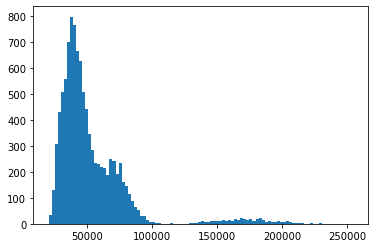

In [40]:
idx = 0
plt.hist(X_train[:, idx], bins=100);

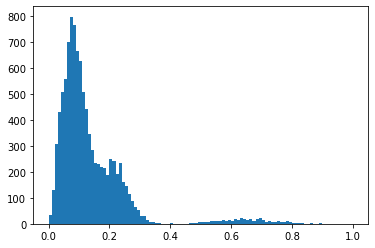

In [41]:
plt.hist(X_train_norm[:, idx], bins=100);

In [42]:
sc_std = preprocessing.StandardScaler()
X_train_std = sc_std.fit_transform(X_train)
X_test_std = sc_std.transform(X_test)


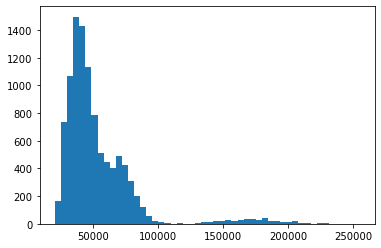

In [43]:
idx = 0
plt.hist(X_train[:, idx], bins=50);

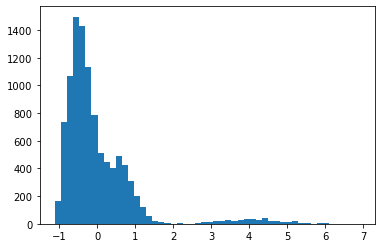

In [44]:
idx = 0
plt.hist(X_train_std[:, idx], bins=50);

In [45]:
array_k = np.arange(1,11)
train_accuracy = np.empty(len(array_k))
test_accuracy = np.empty(len(array_k))
norm_train_accuracy = np.empty(len(array_k))
norm_test_accuracy = np.empty(len(array_k))
std_train_accuracy = np.empty(len(array_k))
std_test_accuracy = np.empty(len(array_k))


for ind, k in enumerate(array_k):

    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    print("Sem Escalonamento de Features")
    print("Predições para k = " + str(k) + ":", y_pred) 
    accuracy = metrics.accuracy_score(y_test, y_pred)
    print('Acurácia: {:.5f}'.format(accuracy))
    
    train_accuracy[ind] = knn.score(X_train, y_train)
    test_accuracy[ind] = accuracy

    knn.fit(X_train_norm, y_train)
    y_pred = knn.predict(X_test_norm)
    print("\nNormalizado")
    print("Predições para k = " + str(k) + ":", y_pred) 
    accuracy = metrics.accuracy_score(y_test, y_pred)
    print('Acurácia: {:.5f}'.format(accuracy))
    
    norm_train_accuracy[ind] = knn.score(X_train_norm, y_train)
    norm_test_accuracy[ind] = accuracy

    knn.fit(X_train_std, y_train)
    y_pred = knn.predict(X_test_std)
    print("\nPadronizado")
    print("Predições para k = " + str(k) + ":", y_pred) 
    accuracy = metrics.accuracy_score(y_test, y_pred)
    print('Acurácia: {:.5f}'.format(accuracy))
    
    std_train_accuracy[ind] = knn.score(X_train_std, y_train)
    std_test_accuracy[ind] = accuracy


    print("\n***********************************************************************\n")

Sem Escalonamento de Features
Predições para k = 1: ['DERMASON' 'SEKER' 'BOMBAY' ... 'HOROZ' 'DERMASON' 'SEKER']
Acurácia: 0.73494

Normalizado
Predições para k = 1: ['DERMASON' 'SEKER' 'BOMBAY' ... 'HOROZ' 'DERMASON' 'SIRA']
Acurácia: 0.90890

Padronizado
Predições para k = 1: ['DERMASON' 'SEKER' 'BOMBAY' ... 'HOROZ' 'DERMASON' 'SIRA']
Acurácia: 0.90685

***********************************************************************

Sem Escalonamento de Features
Predições para k = 2: ['DERMASON' 'SEKER' 'BOMBAY' ... 'HOROZ' 'DERMASON' 'SEKER']
Acurácia: 0.70526

Normalizado
Predições para k = 2: ['DERMASON' 'SEKER' 'BOMBAY' ... 'HOROZ' 'DERMASON' 'SIRA']
Acurácia: 0.89979

Padronizado
Predições para k = 2: ['DERMASON' 'SEKER' 'BOMBAY' ... 'HOROZ' 'DERMASON' 'SIRA']
Acurácia: 0.90479

***********************************************************************

Sem Escalonamento de Features
Predições para k = 3: ['DERMASON' 'SEKER' 'BOMBAY' ... 'HOROZ' 'DERMASON' 'SIRA']
Acurácia: 0.72495

Normali

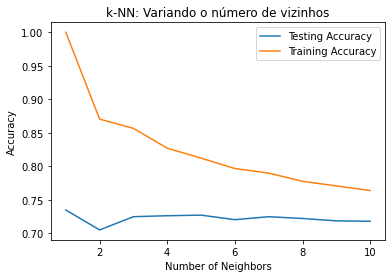

In [51]:

plt.title('k-NN: Variando o número de vizinhos')
plt.plot(array_k, test_accuracy, label = 'Testing Accuracy')
plt.plot(array_k, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

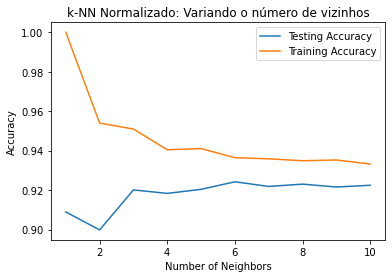

In [47]:
plt.title('k-NN Normalizado: Variando o número de vizinhos')
plt.plot(array_k, norm_test_accuracy, label = 'Testing Accuracy')
plt.plot(array_k, norm_train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

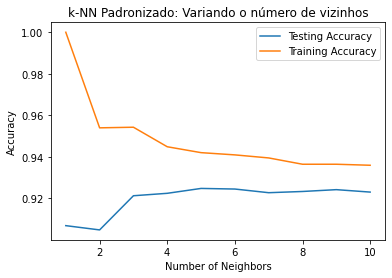

In [48]:
plt.title('k-NN Padronizado: Variando o número de vizinhos')
plt.plot(array_k, std_test_accuracy, label = 'Testing Accuracy')
plt.plot(array_k, std_train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

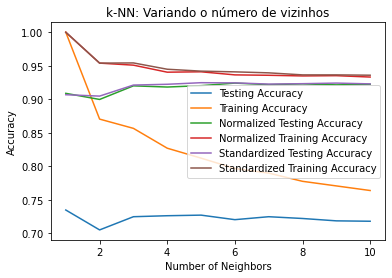

In [53]:
plt.title('k-NN: Variando o número de vizinhos')
plt.plot(array_k, test_accuracy, label = 'Testing Accuracy')
plt.plot(array_k, train_accuracy, label = 'Training Accuracy')
plt.plot(array_k, norm_test_accuracy, label = 'Normalized Testing Accuracy')
plt.plot(array_k, norm_train_accuracy, label = 'Normalized Training Accuracy')
plt.plot(array_k, std_test_accuracy, label = 'Standardized Testing Accuracy')
plt.plot(array_k, std_train_accuracy, label = 'Standardized Training Accuracy')

plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()